## Programming for Data Applications

### AE1: Text Analysis using Python and Jupyter Notebook

### Student number: 23220052

### Word count: 2527 words

#### I - Data loading - 10 Marks (S2d): 

##### Find a suitable dataset for your project. This should be a text file containing full sentences, with a minimum length of 10 000 words. (You can find such datasets on Project Gutenberg, download files using the Plain Text UTF-8 link)

First of all, we are looking for a suitable dataset for our project. 

From Project Gutenberg, we decided to choose the dataset "Zadig; Or the Book of Fate" by Voltaire. 

In order to use this dataset for our project, we first need to download the file using Plain Text UTF-8 link. 

 Before starting the assignment, we will be importing all libraries and packages required for our programme solution

- "import os" module to use the operating system dependent functionality allowing us to interact with file systems, manipulate paths and perform operating system-related tasks. (Python documentation, 2024)
- "import urllib" module to retrieve/fetch/work with data from URLs (Python documentation, 2024)
- "import time" module to work with time-related functions (Python documentation, 2024)
- "import csv" module to work with Comma Separated Values files as well as read and write tabular data in CSV format (Python documentation, 2024)
- "import nltk" module to work with human language data, categorize text and analyze linguistic structure (NLTK, 2024)
- "import requests" module to work with HTTP requests (W3 School, 2024)
- "import re" module to work with regular expression matching operations (Python documentation, 2024)
- "import string" module to check whether a character, slice, or string contains letters, digits or symbols (Launch code education, n.d) 
- "import pandas as pd" library to manipulate and analyse data (W3 School, 2024)
- "import numpy as np" library to perform mathematical operations (W3 School, 2024)
- "import seaborn as sns" data visualization library (based on Matplotlib) to make statistical graphics, explore and understand the data (Seaborn documentation, 2024)
- "import matplotlib.pyplot as plt" module to create different types of plots and charts (Matplotlib documentation, 2024)

In [1]:
#We first import all libraries and packages 

import os 
import urllib
import time 
import csv
import nltk
import requests
import re 
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Once done, we then create a variable to contain our book URL address

In [2]:
#"Zadig; Or the Book of Fate" by Voltaire

zadig_url = 'https://www.gutenberg.org/cache/epub/18972/pg18972.txt'
print(zadig_url) 

https://www.gutenberg.org/cache/epub/18972/pg18972.txt


We then want to download the data into one single file. To do that, we first define our download function. 

In [3]:
#We define our download function
def download(url, folder=".", filename="Zadig;OrtheBookofFate.txt", encoding= 'UTF-8'):
    """
    Download "Zadig; Or the Book of Fate" by Voltaire from Project GutenbergLinks. 
    """
    
    #We provide a name to our file
    if filename is None: 
        #Use default filename  
        filename = os.path.basename(urllib.parse.urlparse(url).path) 
       
            
    #We join the specified folder to the determined filename into a filepath 
    filepath = os.path.join(folder, filename) 
    
    #If the filepath already exists, we print the below message
    if os.path.isfile(filepath): 
        print(f'File {filepath} already exists')
        return filepath
    
    #If the filepath needs to be downloaded, we print the downloaded message
    components = urllib.parse.urlparse(url)
    print(f"Downloading '{os.path.basename(components.path)}' from {components.netloc}")
    
    
    #Finally, we show how long the file took to download
    t0 = time.time()
    try:
        urllib.request.urlretrieve(url, filepath)
    except KeyboardInterrupt: 
        if os.path.exists(filepath): 
            #We remove downloaded file 
            os.remove(filepath)
        raise
        
    dt = time.time() - t0 
    
    #We print our result
    print(f"Download complete ({dt: .2f}s)")
    return filepath

Once defined, we now download the data from the url link, this will give us the file path that we want to use in this exercise.

In [4]:
download(zadig_url)

File ./Zadig;OrtheBookofFate.txt already exists


'./Zadig;OrtheBookofFate.txt'

Then, we want to open our downloaded file in read mode into our console in order for us to work on it.

In [5]:
#To open our downloaded file in read mode 

#We first assign our filename path to the variable file_path
file_path = "./Zadig;OrtheBookofFate.txt"

#Then, we open our file in read mode
with open(file_path, "r", encoding= 'UTF-8') as first_file:
    text = first_file.read()

#Finally, we print the text to our console
print(text)

﻿The Project Gutenberg eBook of Zadig; Or, The Book of Fate
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Zadig; Or, The Book of Fate


Author: Voltaire

Release date: August 3, 2006 [eBook #18972]

Language: English

Credits: Produced by Barbara Tozier, Bill Tozier, Cosma Shalizi and
        the Online Distributed Proofreading Team at
        http://www.pgdp.net


*** START OF THE PROJECT GUTENBERG EBOOK ZADIG; OR, THE BOOK OF FATE ***




Produced by Barbara Tozier, Bill Tozier, Cosma Shalizi and
the Online Distributed Proofreading Team at
http://www.pgdp.net





[Illustration]




Once done, prior to starting working on our programme solution, we want to check whether our text has a minimum length of 10 000 words.

To do that, we first want to use the split method to split the input text into a list of words. Then, with the len() function, we calculate how many words our text contains. 

In [6]:
#To calculate the number of words in our text 

split_text = text.split()

text_length = len(split_text)

print(f" Zadig; Or the Book of Fate length is: {text_length} words.")

 Zadig; Or the Book of Fate length is: 34313 words.


#### II - Data Cleaning and Preprocessing - 20 marks (K1d, K2d, K3d, S2d)

##### Perform necessary data cleaning steps, which may include removing unnecessary preamble on the downloaded text

In order to clean our text, we first want to remove all the unnecessary preamble on the downloaded text to only keep our required text. To do that, we define our extract_text function which consists in searching where the text starts and ends and cutting it accordingly. 

In [7]:
#We define our extract_text function
def extract_text(text, text_start, text_end):

#We search the start (text_start) and end (text_end) indices in our text
    start_indice = re.search(text_start, text)
    end_indice = re.search(text_end, text)

#We then check if the start and end indices are found
    if start_indice and end_indice: 
        start_index = start_indice.end()
        end_index = end_indice.start()
        
#If both indices are found, we return the text between the indices
        new_text = text[start_index:end_index]
        return new_text
    
#Otherwise, we return the original text
    else: 
        return text 

Once defined, we now need to define our start and end markers in our text, in order to call our our extract_text function.

In [8]:
#We define our start and end markers for the required text

#We create text_start and text_end variables to use for our extract_text function
text_start = re.escape("*** START OF THE PROJECT GUTENBERG EBOOK ZADIG; OR, THE BOOK OF FATE ***")
text_end = re.escape(" *** END OF THE PROJECT GUTENBERG EBOOK ZADIG; OR, THE BOOK OF FATE ***")

#Finally, we call our extract_text function with the suitable start and end variables
new_text = extract_text(text, text_start, text_end)
print(new_text)






Produced by Barbara Tozier, Bill Tozier, Cosma Shalizi and
the Online Distributed Proofreading Team at
http://www.pgdp.net





[Illustration]




_ZADIG_;

OR, THE

Book of Fate.

AN

Oriental HISTORY,

Translated from the

_French_ ORIGINAL

OF

Mr. _VOLTAIRE_.


    ----_Quo fata trahunt, retrahuntque sequamur.
    Per varios casus, per tot discrimina rerum,
    Tendimus in Latium._----VIRG.


_LONDON_:

Printed for IOHN BRINDLEY, Bookseller
to His Royal Highness the Prince of
_Wales_, in _New Bond-Street_.

MDCCXLIX.




THE

DEDICATION

TO THE

SULTANA _SHERAA_,

BY

_SADI_.

The 18th of the Month _Scheval_, in the Year of the _Hegira_, 837.

Thou Joy of ev'ry Eye! Thou Torment of every Heart! Thou Intellectual
Light! I do not kiss the Dust of thy Feet; because thou seldom art
seen out of the Seraglio, and when thou art, thou walkest only on
the Carpets of _Iran_, or on Beds of Roses.

I here present you with a Translation of the Work of an ancient
_Sage_, who having the Happ

Moreover, we realised that our new_text contains urls. As part of our data cleaning process, we want to remove them for our programme solution. 

In [9]:
#We remove the urls and hyperlinks from our new_text 

#We define the regex pattern to match urls and hyperlinks
url_pattern = re.compile(r'https?://\S+')

#We then use the regex pattern to substitute urls with empty strings
free_text = url_pattern.sub('', new_text)

#We print the our text with no urls
print(free_text)






Produced by Barbara Tozier, Bill Tozier, Cosma Shalizi and
the Online Distributed Proofreading Team at






[Illustration]




_ZADIG_;

OR, THE

Book of Fate.

AN

Oriental HISTORY,

Translated from the

_French_ ORIGINAL

OF

Mr. _VOLTAIRE_.


    ----_Quo fata trahunt, retrahuntque sequamur.
    Per varios casus, per tot discrimina rerum,
    Tendimus in Latium._----VIRG.


_LONDON_:

Printed for IOHN BRINDLEY, Bookseller
to His Royal Highness the Prince of
_Wales_, in _New Bond-Street_.

MDCCXLIX.




THE

DEDICATION

TO THE

SULTANA _SHERAA_,

BY

_SADI_.

The 18th of the Month _Scheval_, in the Year of the _Hegira_, 837.

Thou Joy of ev'ry Eye! Thou Torment of every Heart! Thou Intellectual
Light! I do not kiss the Dust of thy Feet; because thou seldom art
seen out of the Seraglio, and when thou art, thou walkest only on
the Carpets of _Iran_, or on Beds of Roses.

I here present you with a Translation of the Work of an ancient
_Sage_, who having the Happiness of living fre

##### Remove any punctuation from the text

Prior to removing any punctuation from our text, we first want to tokenize it. This allows us to break down our text into individual tokens. Please note that punctuation marks carry meaning and contribute to the grammatical structure of a sentence. Therefore, tokenizing the text prior to removing the punction preserve these characters as individual tokens as well as the meaning of each sentences.  

Moreover, tokenizing our text consists in first tokenizing it per sentence, then per words. This way, we enable the understanding of our text structure and meaning at a broader level and avoid the ambiguity of words by providing context in which they appear (This will be usefule for our part-of-speech tagging task). 

Therefore, we first tokenize our text per sentence. To do that, we first need to download the 'punkt' resource from the imported NLTK module, which is a pre-trained tokenizer model for languages that allows the division of a text into a list of sentences (NLTK, 2024).

In [10]:
#We frist tokenize our text into sentences 

#We download the 'punkt' torkenizer from NLTK
nltk.download('punkt')

#We then import the sentence tokenizer from NLTK
from nltk.tokenize import sent_tokenize

#We tokenize our text into sentences
tokenized_sentences = nltk.sent_tokenize(free_text)

#We print our result
print(tokenized_sentences)

['\n\n\n\n\nProduced by Barbara Tozier, Bill Tozier, Cosma Shalizi and\nthe Online Distributed Proofreading Team at\n\n\n\n\n\n\n[Illustration]\n\n\n\n\n_ZADIG_;\n\nOR, THE\n\nBook of Fate.', 'AN\n\nOriental HISTORY,\n\nTranslated from the\n\n_French_ ORIGINAL\n\nOF\n\nMr. _VOLTAIRE_.', '----_Quo fata trahunt, retrahuntque sequamur.', 'Per varios casus, per tot discrimina rerum,\n    Tendimus in Latium._----VIRG.', '_LONDON_:\n\nPrinted for IOHN BRINDLEY, Bookseller\nto His Royal Highness the Prince of\n_Wales_, in _New Bond-Street_.', 'MDCCXLIX.', 'THE\n\nDEDICATION\n\nTO THE\n\nSULTANA _SHERAA_,\n\nBY\n\n_SADI_.', 'The 18th of the Month _Scheval_, in the Year of the _Hegira_, 837.', "Thou Joy of ev'ry Eye!", 'Thou Torment of every Heart!', 'Thou Intellectual\nLight!', 'I do not kiss the Dust of thy Feet; because thou seldom art\nseen out of the Seraglio, and when thou art, thou walkest only on\nthe Carpets of _Iran_, or on Beds of Roses.', "I here present you with a Translation of th

[nltk_data] Downloading package punkt to /Users/Ghita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now we want to break our text into words. So we tokenize our tokenized_sentences text by words.

In [11]:
#Then, we tokenize our text into words

#We first import the word tokenizer from NLTK
from nltk.tokenize import word_tokenize

#We then tokenize each tokenized sentence into words
tokenized_words = [nltk.word_tokenize(x) for x in tokenized_sentences]

#We print our result
print(tokenized_words)

[['Produced', 'by', 'Barbara', 'Tozier', ',', 'Bill', 'Tozier', ',', 'Cosma', 'Shalizi', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', '[', 'Illustration', ']', '_ZADIG_', ';', 'OR', ',', 'THE', 'Book', 'of', 'Fate', '.'], ['AN', 'Oriental', 'HISTORY', ',', 'Translated', 'from', 'the', '_French_', 'ORIGINAL', 'OF', 'Mr.', '_VOLTAIRE_', '.'], ['--', '--', '_Quo', 'fata', 'trahunt', ',', 'retrahuntque', 'sequamur', '.'], ['Per', 'varios', 'casus', ',', 'per', 'tot', 'discrimina', 'rerum', ',', 'Tendimus', 'in', 'Latium._', '--', '--', 'VIRG', '.'], ['_LONDON_', ':', 'Printed', 'for', 'IOHN', 'BRINDLEY', ',', 'Bookseller', 'to', 'His', 'Royal', 'Highness', 'the', 'Prince', 'of', '_Wales_', ',', 'in', '_New', 'Bond-Street_', '.'], ['MDCCXLIX', '.'], ['THE', 'DEDICATION', 'TO', 'THE', 'SULTANA', '_SHERAA_', ',', 'BY', '_SADI_', '.'], ['The', '18th', 'of', 'the', 'Month', '_Scheval_', ',', 'in', 'the', 'Year', 'of', 'the', '_Hegira_', ',', '837', '.'], ['Thou', 'Joy', 

Now that we tokenized our text per sentences, then per words, we can remove the punctuations marks. 

To do that, we firstly want to find out what type of punctuation is going to be removed

In [12]:
#We print the string containing punctuation characters
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Then, we want to remove all the characters of the above string.punctuation from our tokenized_words list. To do that, we first want to create a translation table to replace all the punctuation characters with None (IBM, 2015).

In [13]:
translation_table = str.maketrans('','', string.punctuation)

#Then, we apply it to our tokenized_words list
cleaned_text = [[word.translate(translation_table) for word in sentence] for sentence in tokenized_words]

#We print our result
print(cleaned_text)

[['Produced', 'by', 'Barbara', 'Tozier', '', 'Bill', 'Tozier', '', 'Cosma', 'Shalizi', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', '', 'Illustration', '', 'ZADIG', '', 'OR', '', 'THE', 'Book', 'of', 'Fate', ''], ['AN', 'Oriental', 'HISTORY', '', 'Translated', 'from', 'the', 'French', 'ORIGINAL', 'OF', 'Mr', 'VOLTAIRE', ''], ['', '', 'Quo', 'fata', 'trahunt', '', 'retrahuntque', 'sequamur', ''], ['Per', 'varios', 'casus', '', 'per', 'tot', 'discrimina', 'rerum', '', 'Tendimus', 'in', 'Latium', '', '', 'VIRG', ''], ['LONDON', '', 'Printed', 'for', 'IOHN', 'BRINDLEY', '', 'Bookseller', 'to', 'His', 'Royal', 'Highness', 'the', 'Prince', 'of', 'Wales', '', 'in', 'New', 'BondStreet', ''], ['MDCCXLIX', ''], ['THE', 'DEDICATION', 'TO', 'THE', 'SULTANA', 'SHERAA', '', 'BY', 'SADI', ''], ['The', '18th', 'of', 'the', 'Month', 'Scheval', '', 'in', 'the', 'Year', 'of', 'the', 'Hegira', '', '837', ''], ['Thou', 'Joy', 'of', 'evry', 'Eye', ''], ['Thou', 'Torment', 'of', 'ever

#### III - Analysis - 30 Marks (K2d, K3d, S2d)

##### Tag each word in the dataset with a part-of-speech tag

For our knowledge, the potential part-of-speech (POS) tags are the below (Python programming, n.d): 

We first want to process POS tagging in our cleaned_text, meaning that we will label each word to its corresponding POS. 

In [14]:
#We first import the pos_tag module from NLTK
from nltk import pos_tag

#We convert our nested list of sentences into a single list
cleantokenized_list = [word for sentence in cleaned_text for word in sentence]

#We tokenize each word in our single list
words = [word_tokenize(x) for x in cleantokenized_list]

#We perform POS tagging 
tagged_words_list = nltk.tag.pos_tag_sents(words)

#We print our result
print(tagged_words_list)

[[('Produced', 'VBN')], [('by', 'IN')], [('Barbara', 'NN')], [('Tozier', 'NN')], [], [('Bill', 'NN')], [('Tozier', 'NN')], [], [('Cosma', 'NN')], [('Shalizi', 'NN')], [('and', 'CC')], [('the', 'DT')], [('Online', 'NN')], [('Distributed', 'VBN')], [('Proofreading', 'VBG')], [('Team', 'NN')], [('at', 'IN')], [], [('Illustration', 'NN')], [], [('ZADIG', 'NN')], [], [('OR', 'CC')], [], [('THE', 'DT')], [('Book', 'NN')], [('of', 'IN')], [('Fate', 'NN')], [], [('AN', 'NN')], [('Oriental', 'JJ')], [('HISTORY', 'NN')], [], [('Translated', 'VBN')], [('from', 'IN')], [('the', 'DT')], [('French', 'JJ')], [('ORIGINAL', 'NN')], [('OF', 'IN')], [('Mr', 'NN')], [('VOLTAIRE', 'NN')], [], [], [], [('Quo', 'NN')], [('fata', 'NNS')], [('trahunt', 'NN')], [], [('retrahuntque', 'NN')], [('sequamur', 'NN')], [], [('Per', 'IN')], [('varios', 'NNS')], [('casus', 'NN')], [], [('per', 'IN')], [('tot', 'NN')], [('discrimina', 'NN')], [('rerum', 'NN')], [], [('Tendimus', 'NN')], [('in', 'IN')], [('Latium', 'NN')]

##### Calculate the total proportion of each part-of-speech identified in the dataset. For example, what percentage of the text consists of adverbs, nouns or adjectives.

First of all, we want to find all the POS type present in our text.

In [15]:
#We extract the POS tags from our tagged_words_list 
tagged_words = [word_pos_tuple[1] for sentence in tagged_words_list for word_pos_tuple in sentence if len(word_pos_tuple) ==2]

#We create a set of unique POS types
pos_types = set(tagged_words)

#We print our result
print("Unique POS types: ")
for pos_type in pos_types: 
    print(pos_type)

Unique POS types: 
JJ
PRP$
WDT
VB
JJR
NNS
PRP
RB
TO
NN
EX
VBP
VBD
IN
VBZ
WP$
NNP
WP
UH
JJS
RBR
VBN
MD
VBG
CC
WRB
CD
DT


Then, we want to find the count of each POS type. To do that, we need to import the Counter class from the collection module, which allows to count the occurences of elements in a set (Python documentation, 2024). 

In [16]:
#We first import the Counter class from the collection module
from collections import Counter

#We count the occurences of each POS type
pos_counts = Counter(tagged_words)

#We print our result
print("Occurence of each POS types: ")
for pos_type, count in pos_counts.items(): 
    print(f"{pos_type}:{count}")

Occurence of each POS types: 
VBN:616
IN:4510
NN:8957
CC:1257
DT:3491
VBG:518
JJ:1603
NNS:1438
NNP:363
TO:920
PRP$:1252
CD:250
PRP:2115
VB:683
RB:1545
WRB:127
JJS:157
WP:212
RBR:108
VBZ:238
MD:361
VBP:130
VBD:1299
WDT:125
UH:7
JJR:18
WP$:17
EX:8


Finally, we calculate the proportion of each POS type in our dataset tagged_words. 

In [17]:
#We first define the total number of words in our dataset 
total_words = len(tagged_words)

#We calculate the proportion of each POS type
pos_proportions = {pos_type: count / total_words for pos_type, count in pos_counts.items()}

#We print our result
print("Proportion of each POS type: ") 
for pos_type, proportion in pos_proportions.items(): 
    #We format the output as a percentage with two decimal places
    print(f"{pos_type}:{proportion: .2%}")

Proportion of each POS type: 
VBN: 1.91%
IN: 13.95%
NN: 27.71%
CC: 3.89%
DT: 10.80%
VBG: 1.60%
JJ: 4.96%
NNS: 4.45%
NNP: 1.12%
TO: 2.85%
PRP$: 3.87%
CD: 0.77%
PRP: 6.54%
VB: 2.11%
RB: 4.78%
WRB: 0.39%
JJS: 0.49%
WP: 0.66%
RBR: 0.33%
VBZ: 0.74%
MD: 1.12%
VBP: 0.40%
VBD: 4.02%
WDT: 0.39%
UH: 0.02%
JJR: 0.06%
WP$: 0.05%
EX: 0.02%


#### IV - Visualisation - 20 marks (K2d, K3d, S2d)

##### Create a bar graph using a Python plotting library (such as matplotlib or seaborn) to visualise the proportions of different parts-of-speech in the dataset. The x-axis should display the parts-of-speech, and the y-axis should display the corresponding proportions

We want to create a barplot that contains all the POS tags types present in our text and their corresponding proportions. 

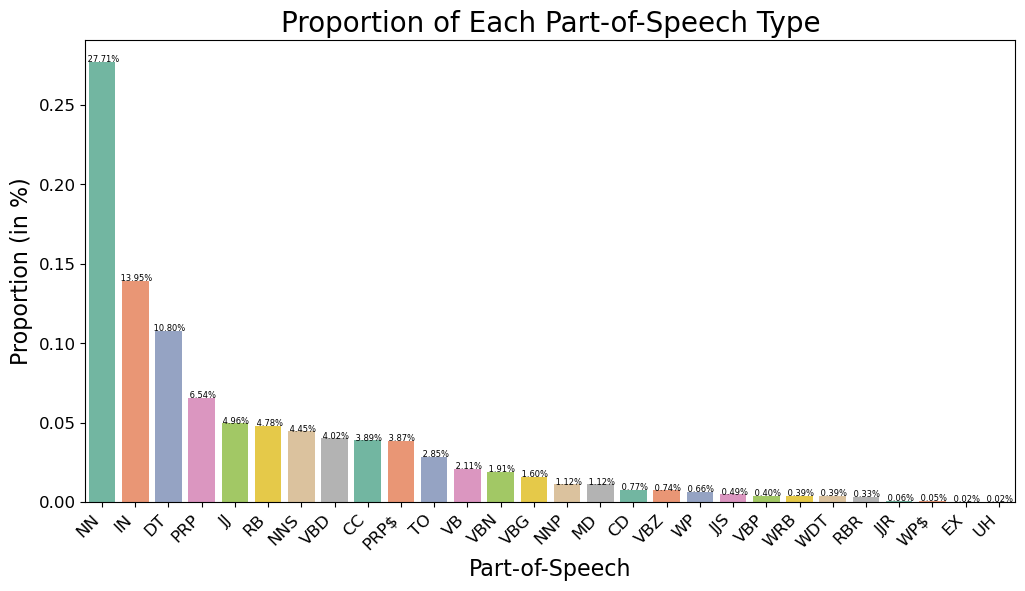

In [18]:
#We first create a dataframe from the calculated POS proportions
dataset = pd.DataFrame(list(pos_proportions.items()), columns = ['Part-of-Speech', 'Proportion'])

#Then, we sort the dataframe by the 'Proportion' column in descending order
dataset = dataset.sort_values(by = 'Proportion', ascending = False) 

#We create a bar plot 
plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'Part-of-Speech', y = 'Proportion', data=dataset, palette='Set2')

#We add the proportion numbers above each bar 
for index, value in enumerate(dataset['Proportion']):
    ax.text(index, value, f'{value: .2%}', ha='center', fontsize=6, color='black')
    
#We customize the barplot appearance
plt.xlabel('Part-of-Speech', fontsize = 16)
plt.ylabel('Proportion (in %)', fontsize = 16)
plt.title('Proportion of Each Part-of-Speech Type', fontsize = 20)

#We rotate and adjust the x-axis labels for better readibility
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.yticks(fontsize = 12)

#We display the plot
plt.show()

#### V - Report - 10 marks + 10 marks (K1d, K4d, T2d, T3d, T4d)

**Abstract:**

Our project is mainly based on the use of Natural Language Processing (NLP), which leverage computational linguistics to comprehend, recognize and interpret human text for analysis. This approach was applied to “Zadig; or the Book of Faith” a philosophical book written by Voltaire in 1747. In this process, data loading, cleaning, pre-processing and analysis were employed to understand the distribution of parts of speech (POS) in our chosen text. Indeed, our methodology involved selecting a dataset to download and processing, opening the text file to clean and pre-process the content by using tokenization methods to ensure the preservation of linguistic context. Then, we conducted analysis using POS tagging to explore occurences and proportions. Finally, we represented those POS proportions in a barplot, which revealed a dominance in nouns, prepositions, pronouns, adverbs and adjectives, aligning with characteristics  reminiscent of Old English literature. 

**Keywords:**

NLPs, POS tagging, data loading, data cleaning, data preprocessing, data analysis, tokenization methods, proportions, occurences.

**Introduction:**

Natural Language Processing (NLP), is a set of studies that focuses on the interaction between computers and human language (IBM, n.d). By manipulating human language through computational linguistics, with statistical and machine learning models, NLP enables and facilitates computers understanding, recognition and interpretation of human text in order to analyse textual data and extract meaningful insights from it (DeepLearning.AI, 2023). Our assignment consists in analysing “Zadig; or the Book of Faith”, a philosophical fiction published by the French Enlightenment writer Voltaire in 1747 (Global Grey, no date). Through our programme solution, we aim to perform data cleaning and pre-processing to identify and analyse the proportion of each part of speech (POS) and create a graph to visualize our results. Therefore, this report will shed light on the different steps undertaken to find the distribution and proportion of each POS within the narrative. 

**Methods:**

In this section, we will be explaining the different methods used for our programme solution. 

***a)Data loading:***

To initiate our project, we selected a suitable dataset "Zadig; Or the Book of Fate" by Voltaire from Project Gutenberg.  However, before commencing our assignment, we imported all libraries and packages such as os, urllib, time, csv, nltk, requests, re, string, pandas, numpy, seaborn and matplotlib, required for our programme solution. 
Then, we created a variable “zadig_url”, which we assign to its corresponding url from Project Gutenberg. This way, we displayed our stored text file url into our console for further processing.
Subsequently, we defined our download function designed to retrieve our chosen text data from its specified url and save it to our folder. This function took 4 parameters; the url from which to download data (previously generated), the folder where the downloaded file will be saved,  the specific name we will be giving to our file, and the character encoding scheme used to represent the text. If the filename was not provided, we asked the function to extract it from its url, and create a filepath where the downloaded file will be saved, by joining the specified folder and the determined filename. Then, we asked the function to check if the file already existed in the specified location. If it did, the function prints a message, and returns the filepath without downloading the file again. If it did not exist, the function prints a message indicating the start of the download, including the name of the file and its location. We also asked the function to record the current time (t0) and to attempt to retrieve the file from the specified url. If a keyboard interrupt occurs during the download, the function removes the partially downloaded file before raising the interrupt again. The function calculates the time taken for the download (dt), prints a completion message with the time duration and returns the filepath of the downloaded file.
Once defined, we downloaded the required data from our url link, and opened our downloaded file in read mode as a first_file by specifying the character encoding  “UTF-8”, we assigned it to our “text” variable, which we printed into our console for further processing. 
Finally, prior to delving into our program solution,  we wanted to check whether our text contained a minimum length of 10 000 words. To do that, we used the split method on our “text” variable defined above, which segmented it into a list of words separated by whitespace characters. We then assigned this list of words to our “split_text” variable, applied the len() function to determine its length, as it correspond to the number of words in our text. We stored the previous in our “text_length” variable, printed it and confirmed our text word count. 

***b)Data cleaning and preprocessing:***

In order to clean our text, we removed all the unnecessary preamble on the downloaded text to only keep our required text. To do that, we defined our “extract_text” function which identifies the text start and end, and extracts it accordingly.

Indeed, our extract_text function works with 3 parameters, our text input defined previously, and the start and end marker determined by the “re.search” method. This method finds the starting and ending indices of our “text_start” and “text_end” within our text, storing them into “start_indice” and “end_indice” variables. An if statement is used in order to check whether both indices are found, leading to the extraction of our required text in between these indices from our original text. If either marker is not found, the function returns the original text. Once the function defined, we specified our start and end markers using the “re.escape” function to ensure the proper handling of  any special characters. We then called our “extract_text” function resulting in our required “new_text” displayed into our console. 
Upon further examination, we realised that our “new_text” contained urls and hyperlinks, which necessitate their removal as part of our data cleaning process. To do that, we used the “re.compile” function to create a “url_pattern” that matches urls and hyperlinks. Indeed, the “https?” matches the prefix “http” or “https”, the “://” matches the colon and double slash following the http, the “/S+” matches the non-whitespace characters, which represent the remainder of the url or hyperlink. We then used the “sub()” method which replaces all occurences of the “url_pattern” within our “new_text” with an empty string. This is stored in our new variable “free_text”, that we printed into our console, resulting  in our “new_text” without the urls and hyperlinks. 
Moreover, we proceeded to remove any punctuation from our “free_text”. Prior to it,  we first tokenized our text, breaking it down into sentences then words. As punctuation marks carry meaning and contribute to the grammatical structure of a sentence we preserved these characters as individual tokens as well as the meaning of each sentences.  Indeed, we enabled the understanding of our text structure and meaning at a broader level and avoided the ambiguity of words by providing context in which they appear (this will be useful for our POS tagging tasks). 
Sentence tokenization involves downloading the “punkt” resource from the imported NLTK module, which is a pre-trained tokenizer model for languages that allows the division of a text into a list of sentences (NLTK, 2024).Then, from the NLTK tokenize module we imported the “”sent_tokenize” function that allowed us to break down a text into a list of sentences. We applied the latter to our variable “free_text” and stored our result into our “tokenized_sentences” variable, which we printed to our console. Then, we imported the “word_tokenize” function from the NLTK library, to break down each sentence into a list of words. We applied it to each sentence within our “ tokenized_sentence” list, printed our results stored into our “tokenized_words” variable. 
Finally, now that we tokenized our text per sentences, then per words, we can remove the punctuations marks. To do that, we firstly identify the  punctuation characters for removal, by printing the string containing punctuation characters. Then, we removed all the characters of the above string.punctuation from our tokenized_words list by creating a translation table to replace all the punctuation characters with “None” (IBM, 2015). This is done by using the “str.maketrans” method that maps every punctuation characters to “None”, hence removing them from our list. So for each word in a sentence, the “translate()” method is applied, removing any punctuation from each word in every sentence. This resulted in a new list of tokenized words without punctuation, stored in our “cleaned_text” variable, and printed into our console. 

***c)Analysis:***

Then, we initiate the processing of POS tagging in our “cleaned_text”, meaning that we will label each word to its corresponding POS. To do that, we first imported the “pos_tag” module from NLTK to perform POS tagging on a list of words. Indeed, we converted our nested list of sentences into a single list that named “cleantokenized_list” , using “word_tokenize” function, which resulted in a single list of words to use POS tagging on it. Finally, we use the “pos_tag_sents” function to perform POS tagging on our list of tokenized words, referred to as “words”. This resulted in our “tagged_words_list”, which once printed, displayed our tagged words into the console. 

Next, we calculated the proportion of POS identified in our text. Initially, we identified all the POS types present in our text. To do that, we iterated through each sentence in our “tagged_words_list” and each “word_pos_tuple” in each sentence. Considering only tuples with both word and POS tag (len(word_pos_tuple) ==2), we collected the POS tags (word_pos_tuple[1]) into our new list called “tagged_words”. We then applied to the latter the “set()” function to generate a unique set of POS type, which we printed to our console through a for loop iterating through the set of “pos_types”.

Subsequently, we determined the count of each POS type by importing the Counter class from “collection” module, which allows to count the occurences of elements in a set (Python documentation, 2024). Therefore, the counter class is applied to our “tagged_words” list creating our “pos_count” variable, which is a dictionary where POS type and their corresponding values are stored. The occurences of each POS type are printed to the console through a for loop that iterates through the “pos_count” dictionary. 

Finally, we defined the proportion of each POS type in our dataset “tagged_words”. To do that, we first calculated the total number of words in our dataset through the “len()” function of our “tagged_words” list. Then, we calculated the proportion of each POS type by dividing each POS type “pos_count” dictionary by the total number of words (“total_words”). This resulted in a dictionary named “pos_proportions” that contains POS type with their corresponding proportions. The proportion of each POS type is printed into the console by using a for loop to iterate through the items of “pos_proportions” dictionary. The output is a percentage with 2 decimal places. 


***d)Visualisation:***

Our ultimate step involved generating a barplot that contains all the POS tags types present in our text and their corresponding proportions. To do that, we created a pandas dataframe called “dataset” from our “pos_proportions” dictionary. This dataset contains one column for the type of POS and the other for their corresponding proportions. Then, we sorted the dataframe by proportion in descending order, and created a barplot using seaborn, having each POS type on the x-axis and each proportion on the y-axis. Then, we added a text label displaying each proportion of each bar and customized the appearance of our barplot, included labels, title and axis rotation before displaying it. 

**Discussion and Results:**

From our depicted barplot, we noticed that the highest and most significant proportion of POS in our text is for nouns, accounting for 27.71%, followed by prepositions at 13.95%, determiner at 10.8%, personal pronouns at 6.54%, and adjectives at 4.96% closely followed by adverbs at 4.78%. The subsequent categories include, plural noun (4.45%), past tense verbs (4.02%), coordinate conjunction (3.89%), possessive pronouns (3.87%), ‘to’ (2.85%), verbs (5.6%), proper nouns (1.12%), modals (1.12%), cardinal digits (0.77%), verb in present tense (3rd person) (0.74%), wh-pronouns (0.66%), superlative adjectives (0.49%), present tense (0.40%), wh-adverbs (0.39%), wh-determiner (0.39%), comparative adverbs (0.33%), comparative adjectives (0.06%), possessive wh-pronoun (0.05%), existential “there” (0.02%) and interjections (0.02%), collectively contributing less than 5% each, in descending order.

These results, while surprising, seem to align with the dominance of nouns over verbs in our text. Notably, we noticed that the verb category is further divided into subcategories, which reflect the ability for NLPs to discern verbs conjugation into present or past tense. The overall verb content constitutes 10.78% of the total text. Similarly, nouns are subdivided into nouns and proper nouns, collectively forming 28.83% of the total text. Additionally, adjectives and adverbs each contribute to 5.51% and 5.5% respectively, while pronouns when combined, constitute 11.12%.

Moreover, it is important to note that our text was originally written in French and that POS tags might differ in the original text, considering we are working with its translation. Indeed, the higher prevalence of nouns aligns with the characterisics of Old English literature, which according to the Oxford english dictionary (n.d), is usually distinguished by a large use of verbs, nouns, adjectives, and pronouns. 

On another hand, please, note that prior to completing our programming solution, we first lowered all text cases but we realised that we lost values for  PRP, such as I, as well as our section for NNP/NNPS. We also wanted to remove any digits prior to tokenizing our text however, this would have skewed our data as the text contains 0.77% of cardinal digits. 

Moreover, our text contains roman numerals to indicate chapters numbers, which should fall under cardinal digits, but are considered as nouns. Considering that there are 18 chapters, each written twice (in our table content and  at the beginning of each chapter), we can conclude that our noun proportion is skewed. Moreover, without tokenizing our text per sentence then per words, we would have lost some of the meaning of our words hence leading to a POS mis-tagging and skewed proportions. 

Finally, using our previous text word count, we can estimate the approximate number of words for each POS category.  The noun proportion equates to 9893 nouns, the preposition proportion equates to 4787 prepositions, 3816 pronouns, 3706 determiners, 3699 verbs, 1891 adjectives and 1887 adverbs. Please, keep in mind that our total word count is 34313 words prior to removing urls, hence the approximation. Indeed, we notice that there is a significant difference in each POS tag occurence, when we compare the proportion percentages to our task where we identify the occurence per POS type.

**Conclusion:**

In conclusion, our programme solution consisted of using NLP methods through our chosen book, Zadig; or the Book of Faith by Voltaire. This has allowed us to clean, pre-process our data to visualize the distribution of each POS in our text. Indeed, our programme solution was able to specify the POS tags, however, we noticed that we could combine them into general types such as nouns, pronouns, verbs, adverbs and adjectives. By doing so, we concluded that the predominant proportion of our text words consisted of nouns, followed by preposition, pronouns, determiner, verbs, adjectives and adverbs. This makes sense as the book was translated from Old French to Old English literature.


**References:**